In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from functools import reduce
from scipy.stats import norm

In [3]:
nba = pd.read_parquet('nba_pgdata.parquet')
nba.head()

,Player,Salary,Age,FG,RB,AST,STL,BLK,PTS
0,A.J. Price,885.12,26,2.824561,2.000000,3.596491,0.578947,0.052632,7.736842
1,Aaron Brooks,3250.00,28,2.698113,1.509434,2.150943,0.566038,0.188679,7.094340
2,Al Harrington,6687.40,32,2.000000,2.700000,1.000000,0.400000,0.100000,5.100000
3,Al Horford,12000.00,26,7.783784,10.229730,3.243243,1.054054,1.054054,17.418919
4,Al Jefferson,15000.00,28,7.833333,9.230769,2.102564,1.025641,1.141026,17.833333


In [5]:
nba.columns

Index(['Player', 'Salary', 'Age', 'FG', 'RB', 'AST', 'STL', 'BLK', 'PTS'], dtype='object')

# 1. Regression

## 1.1 Visualization: Make histograms of Salary, Age, FG, RB, AST, STL, BLK, and PTS.

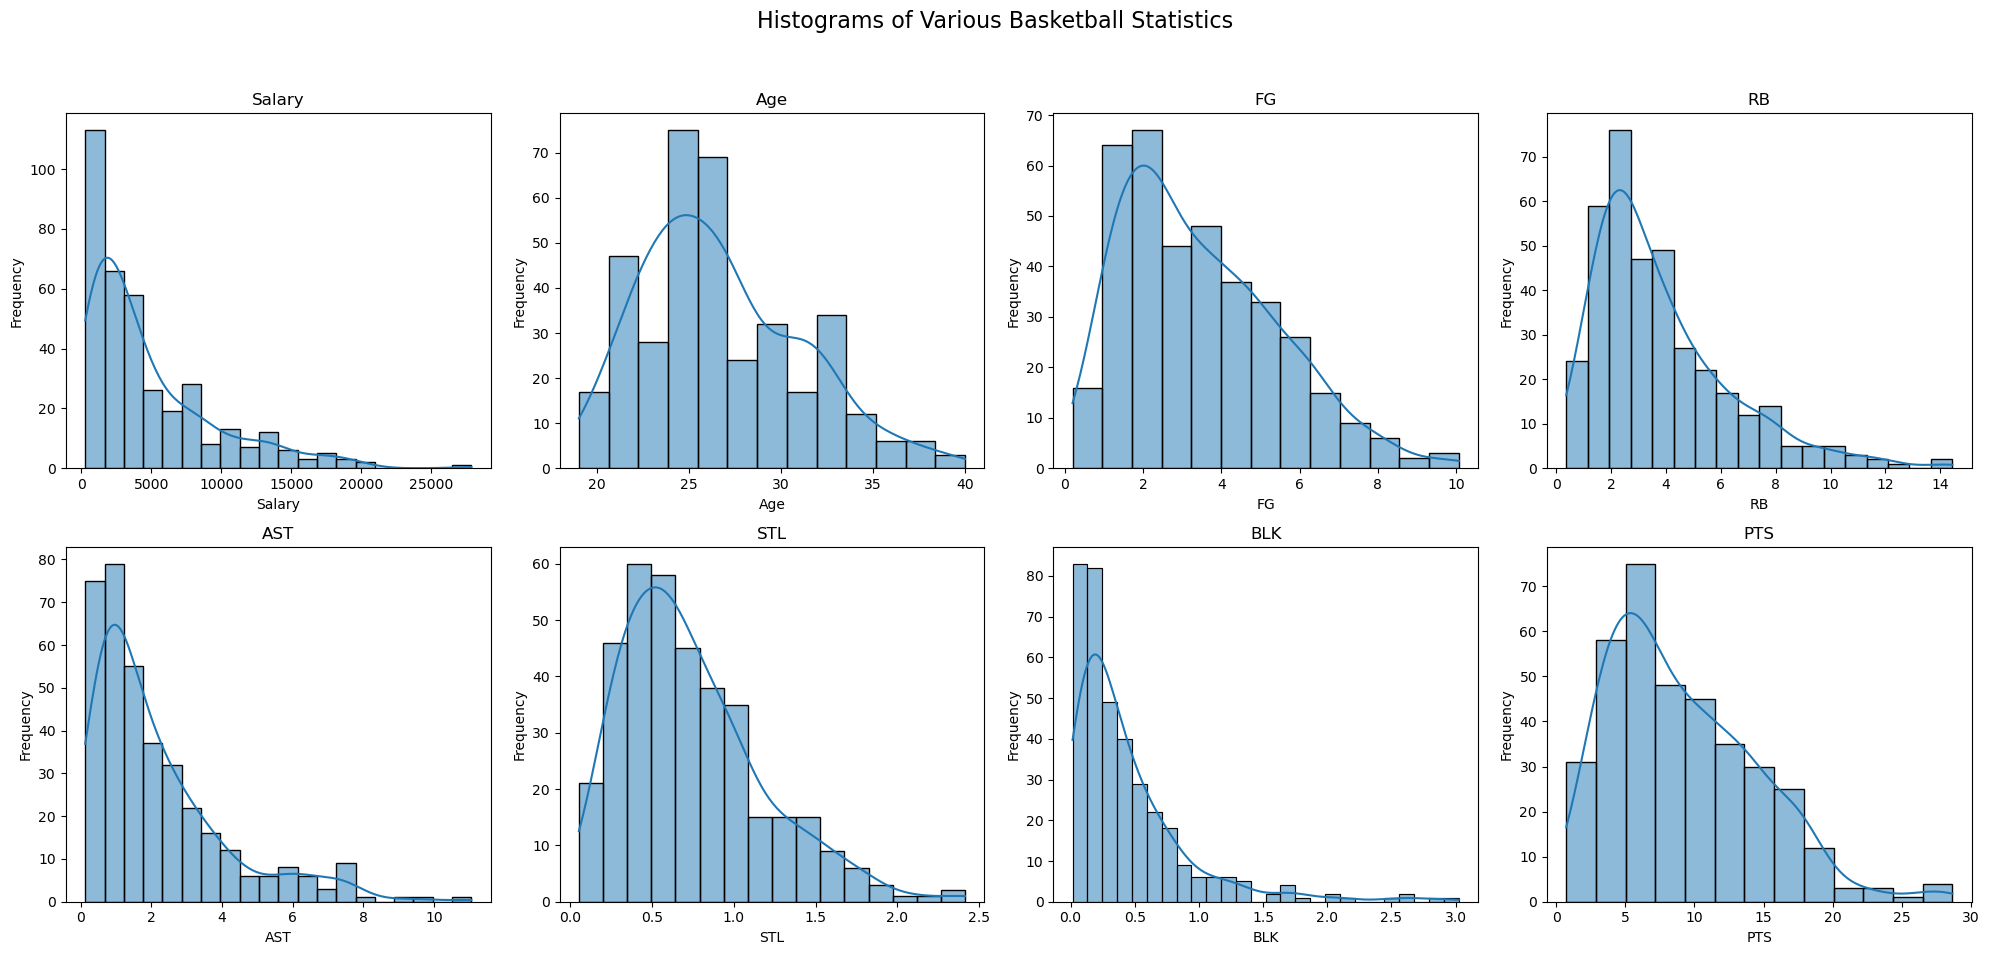

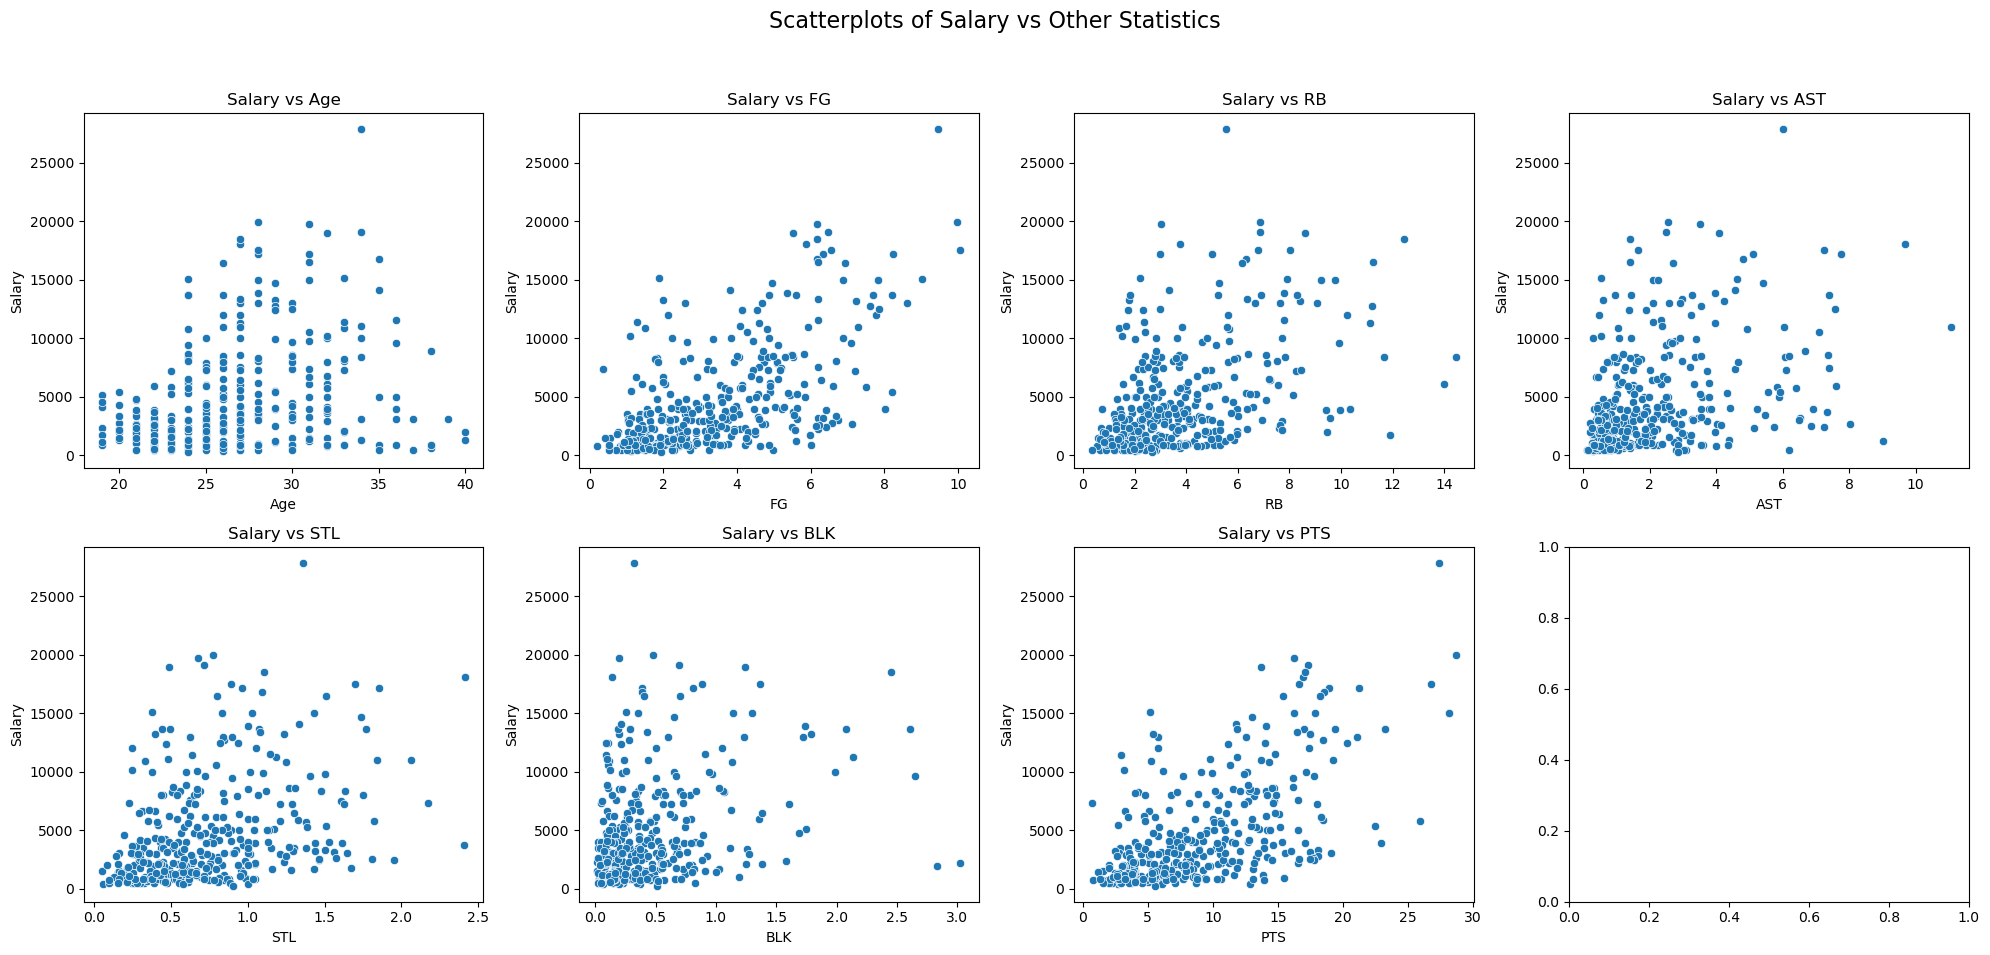

In [4]:

# Setting up the figure for histograms
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Histograms of Various Basketball Statistics', fontsize=16)
hist_cols = ["Salary", "Age", "FG", "RB", "AST", "STL", "BLK", "PTS"]

# Plotting histograms
for i, col in enumerate(hist_cols):
    ax = axes[i//4, i%4]
    sns.histplot(nba[col], ax=ax, kde=True)
    ax.set_title(col)
    ax.set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Scatterplot of Salary versus each of the predictors
scatter_cols = ["Age", "FG", "RB", "AST", "STL", "BLK", "PTS"]
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('Scatterplots of Salary vs Other Statistics', fontsize=16)

for i, col in enumerate(scatter_cols):
    ax = axes[i//4, i%4]
    sns.scatterplot(x=nba[col], y=nba["Salary"], ax=ax)
    ax.set_title(f'Salary vs {col}')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Displaying the plots
plt.show()

#### What do the distributions look like? 

##### Histograms of Player Statistics

Salary: The distribution of salaries is highly right-skewed, which means that while most players earn less, there is a long tail on the right where a few players have very high salaries.

Age: The age distribution is somewhat bell-shaped but exhibits a slight skew to the right, suggesting a larger number of younger players and fewer older players.

Field Goals (FG): The distribution of field goals is right-skewed, pointing to the fact that high-scoring games are less common and most players score fewer field goals.

Rebounds (RB): The histogram of rebounds is also positively skewed, indicating that higher rebound numbers are less frequent among players.

Assists (AST): The assist distribution is notably right-skewed, showing that most players average fewer assists per game.

Steals (STL): The distribution of steals shows a significant skew to the right, implying that most players have a low steal count.

Blocks (BLK): Blocks are extremely right-skewed within the distribution, highlighting that this is a less common event in the game with many players recording very few blocks.

Points (PTS): The points distribution is moderately right-skewed, with most players scoring on the lower end, though there are a few high scorers that extend the tail of the distribution.

##### Scatterplots of Salary vs. Predictors

Salary vs. Age: The relationship between salary and age is scattered, lacking a clear linear pattern, which suggests that age alone may not be a strong predictor of a player's salary.

Salary vs. Field Goals (FG): There is a discernible positive correlation between salary and field goals per game, suggesting that players who score more tend to earn higher salaries.

Salary vs. Rebounds (RB): Salary appears to have a positive relationship with rebounds, though the correlation is not as strong as with field goals, and there's considerable scatter among the data points.

Salary vs. Assists (AST): The plot shows a moderate positive correlation between salary and assists, indicating that players with more assists may tend to have higher salaries, but the relationship is not as strong as with scoring.

Salary vs. Steals (STL): Salary and steals have a scattered relationship with no clear trend, suggesting that steals may not be a major factor in salary determination.

Salary vs. Blocks (BLK): The scatterplot for salary and blocks shows a very weak correlation, indicating that block counts have little impact on salary.

Salary vs. Points (PTS): The scatterplot between salary and points scored shows a clear positive trend, with players who score more points generally earning higher salaries.

By analyzing these distributions and scatterplots, we can gain insights into the statistical performances that are valued in the NBA and how they might relate to a player's salary.

### Integrated Histogram Analysis
The histograms depict the distributions of NBA players' salaries, age, field goals per game (FG), rebounds (RB), assists (AST), steals (STL), blocks (BLK), and points (PTS). There is a prevalent positive skewness across most statistics, with the majority of players recording below-average performances and a minority far exceeding the average. Specifically:

The salary histogram shows a pronounced right skew, indicating that most players earn lower salaries, with a select few earning substantially more, elongating the tail on the right end of the distribution.

The age histogram is relatively bell-shaped but with a slight right skew, suggesting a larger number of younger players in the league and fewer veterans.


### Integrated Scatterplot Analysis
The scatterplots elucidate the relationships between players' salaries and various performance metrics:

The correlation between salary and field goals per game (FG) is positive, suggesting that players with a higher scoring average tend to command higher salaries.

A positive trend is also seen between salary and rebounds (RB), as well as salary and points scored (PTS), indicating that players who excel in these areas are likely to earn more.

The relationships between salary and steals (STL) and blocks (BLK) are less pronounced, suggesting that these stats may have a less significant impact on salary.

The correlation between salary and assists (AST) is moderate, indicating a positive relationship, albeit not as strong as scoring or rebounding.

The scatter of data points in the salary versus age plot is more varied, indicating a less clear relationship between age and salary, thus suggesting that other factors may be more influential in salary determination.

The distribution of data points in these scatterplots offers valuable insights. Some variables show a clear linear relationship with salary, suggesting a strong predictive power, while others are more dispersed, hinting at the need for a nuanced approach in regression modeling. These visual insights are crucial for determining which variables to include in the regression model and inform whether data transformations might be necessary to enhance the model's fit.

## 1.2 Regressions A-D

In [15]:
# Regression A

X = nba[['Age', 'FG', 'RB', 'AST', 'STL', 'BLK']]
Y = nba[['Salary']]

model_A = LinearRegression().fit(X, Y)

In [16]:
# (I) Interpret the estimated coeffcients:

model_A.coef_

array([[  312.09161215,  1156.9816291 ,   223.31242561,   280.49838529,
        -1064.06996224,  1071.10015603]])

In [17]:
# (II) How does the R2 value look? How do you interpret it?

y_pred = model_A.predict(X)

# Calculating R-squared value
r_squared = r2_score(Y, y_pred)
r_squared

0.4921607431727958

In [18]:
## or rsm package -- Ran
import pyrsm as rsm

regression_A = rsm.regress({"nba": nba}, rvar="Salary", evar=["Age", "FG", "RB", "AST", "STL", "BLK"])
regression_A.summary()

Linear regression (OLS)
Data                 : nba
Response variable    : Salary
Explanatory variables: Age, FG, RB, AST, STL, BLK
Null hyp.: the effect of x on Salary is zero
Alt. hyp.: the effect of x on Salary is not zero

           coefficient  std.error  t.value p.value     
Intercept     -8724.67   1131.833   -7.708  < .001  ***
Age             312.09     39.520    7.897  < .001  ***
FG             1156.98    153.881    7.519  < .001  ***
RB              223.31    117.004    1.909   0.057    .
AST             280.50    146.504    1.915   0.056    .
STL           -1064.07    613.248   -1.735   0.084    .
BLK            1071.10    517.030    2.072   0.039    *

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.492, Adjusted R-squared: 0.484
F-statistic: 58.632 df(6, 363), p.value < 0.001
Nr obs: 370


1. Which predictors are significant and which ones are not?

Significant Predictors: Age, FG, and BLK are statistically significant predictors of Salary as their p-values are below the 0.05 threshold for statistical significance. Age and FG have a particularly strong significance with p-values much less than 0.001, indicated by "***".

Non-Significant Predictors: RB, AST, and STL are not statistically significant at the 5% level since their p-values are greater than 0.05. However, RB and AST are on the cusp of significance with p-values just slightly above the threshold, indicated by ".".

2. Do these regression results make sense?

The results make sense; as Age and FG have positive coefficients, suggesting that as players age and their game performance in terms of field goals improves, their salaries tend to increase. The positive coefficient for BLK implies that players who block more also tend to have higher salaries. The negative coefficient for STL is somewhat counterintuitive as one might expect steals to have a positive impact on salary.

3. What hypothesis test is underlying the output seen for each predictor?

The hypothesis test for each predictor is testing whether the effect of the predictor on Salary is different from zero (null hypothesis) versus the alternative hypothesis that the effect is not zero. This is done using a t-test, as reflected by the t-values and p-values.

4. What do the estimated values for the coefficients mean?

The coefficients represent the expected change in Salary (in thousands, assuming Salary is measured in thousands) for a one-unit increase in the predictor, holding all other variables constant. For example, each additional year of age is associated with an increase of 312.09 in salary, and each additional field goal per game is associated with an increase of 1156.98.

5. Which predictor seems the most impactful?

FG appears to be the most impactful predictor of salary with the highest coefficient value that is statistically significant.

6. How does the R^2 value look? How do you interpret it?

The R-squared value of 0.492 indicates that approximately 49.2% of the variability in Salary can be explained by the model's predictors. The Adjusted R-squared of 0.484 takes into account the number of predictors in the model and provides a more conservative estimate of the explained variability.


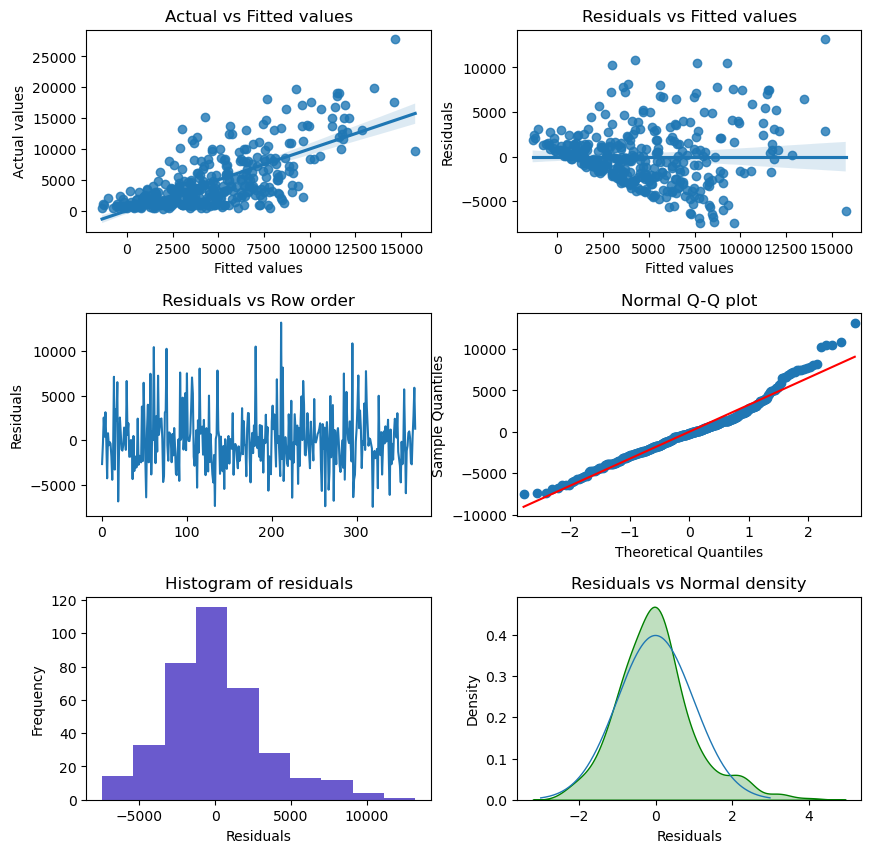

In [19]:
regression_A.plot("dashboard")

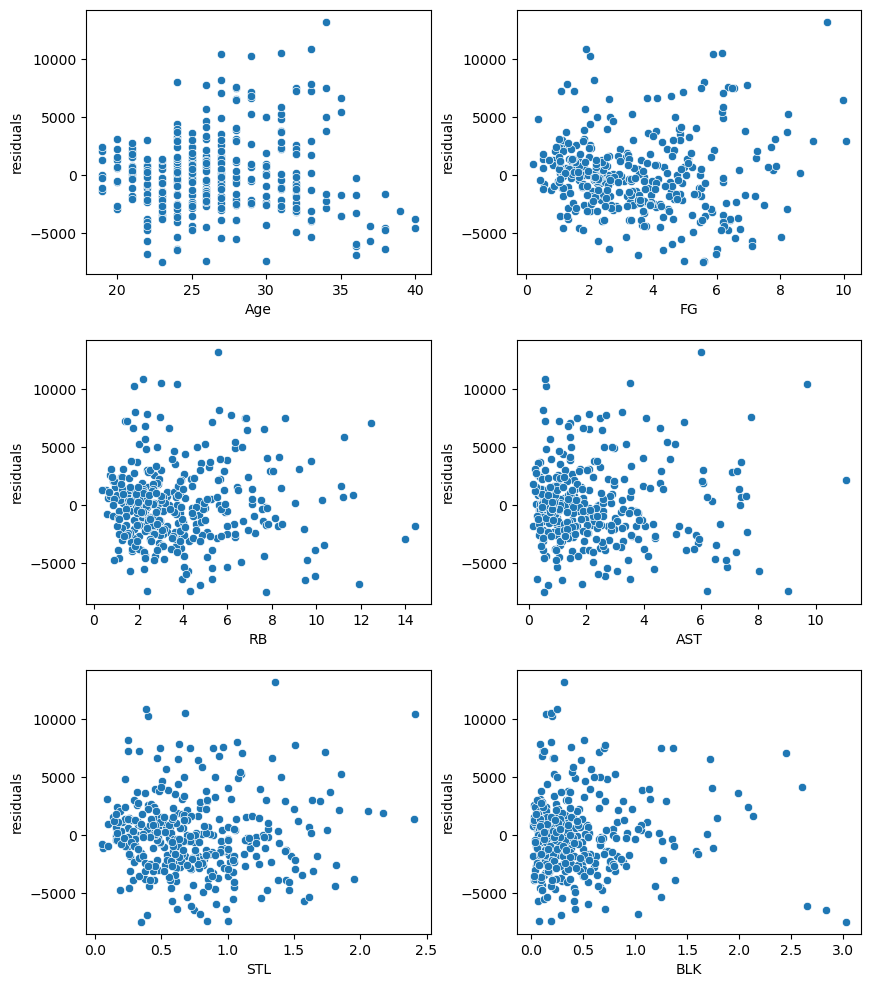

In [20]:
regression_A.plot("residuals")

7. Take a look at the Dashboard regression plots. Think carefully about what is being plotted in each of these plots. Are there any problems standing out to you? In particular, examine closely the Residuals vs Fitted plot 

7.1 Actual vs Fitted Values Plot:

This plot compares the actual salaries with the predicted salaries from the model. Ideally, points should form a straight line along the diagonal, indicating accurate predictions across all values. The noticeable deviation from the diagonal at higher salary values suggests that the model may not be as effective at predicting higher salaries.

7.2 Residuals vs Fitted Values Plot:

In this plot, residuals should be randomly dispersed around the horizontal axis, with no clear pattern. The presence of a funnel shape indicates heteroscedasticity. There's a clear pattern where the residuals spread out with increasing fitted values, which is a violation of the constant variance assumption in linear regression.

7.3 Residuals vs Row Order Plot:

This plot helps to identify trends that may correspond with the chronological order of data collection. Residuals should appear randomly distributed, with no obvious trends or patterns. The plot here does not seem to exhibit any problematic patterns, suggesting that the order of data collection does not bias the residuals.

7.4 Normal Q-Q Plot:

This plot is used to assess whether the residuals follow a normal distribution. The points should lie on the reference line if the residuals are normally distributed. The deviation from the line in the tails suggests that the residuals may have outliers or are not normally distributed.
Histogram of Residuals:

7.5 Histogram of Residuals:

This histogram shows the distribution of residuals. A bell-shaped, symmetric distribution would support the assumption of normality. The plot shows a slight skew, but without more context or a statistical test for normality, it’s hard to conclude if this is problematic.
Residuals vs Normal Density Plot:

7.6 Residuals vs Normal Density Plot:
This plot is another way to visualize the distribution of residuals against the expected normal distribution. The right skewness observed here may suggest that the residuals are not perfectly normal, potentially impacting the model’s inference accuracy.
Residual Plots for Each Predictor:

7.7 Residual Plots for Each Predictor:
These plots help assess the linearity of the relationship between predictors and the response. A non-random pattern (such as a curve or systematic structure) in these plots could suggest non-linearity or the presence of influential outliers. The plots show some patterns, especially for FG, which may indicate that the linear model is not capturing all the nuances of the relationships.

In [21]:
# Regression B
# Transform Salary using the log function to create a new variable called log Salary is created
nba['log_Salary'] = np.log(1+nba['Salary'])

Text(0, 0.5, 'Frequency')

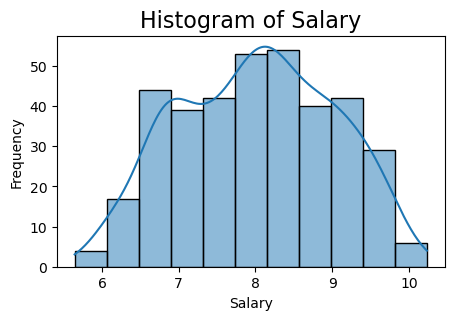

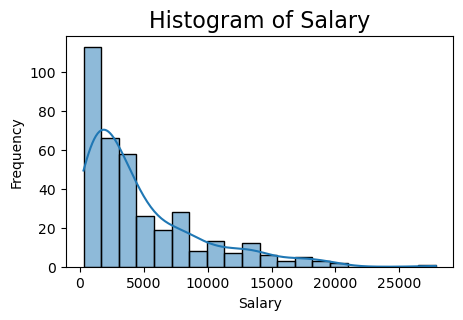

In [26]:
# Visualize a histogram of log Salary.
# Setting the size of the figure
plt.figure(figsize=(5, 3))  # Adjust the figure size as needed

# Creating the histogram
sns.histplot(nba['log_Salary'], kde=True)  

# Setting the title and labels
plt.title('Histogram of Salary', fontsize=16)  
plt.xlabel('Salary')  
plt.ylabel('Frequency')

# compare with the histogram of Salary
# Setting the size of the figure
plt.figure(figsize=(5, 3))  # Adjust the figure size as needed

# Creating the histogram
sns.histplot(nba['Salary'], kde=True)

# Setting the title and labels
plt.title('Histogram of Salary', fontsize=16)
plt.xlabel('Salary')
plt.ylabel('Frequency')

The histogram of log Salary should display a more normal distribution compared to the original Salary histogram. This transformation is beneficial because the log function can help reduce skewness and stabilize the variance, making the data more suitable for linear regression, which assumes normality and homoscedasticity (constant variance) of residuals.


In [23]:
Y_2 = nba[['log_Salary']]

model_B = LinearRegression().fit(X, Y_2)

model_B.coef_

array([[0.05770937, 0.20762529, 0.06670888, 0.04627618, 0.00163214,
        0.210317  ]])

In [29]:
# Then, run the same regression but using log Salary as the response variable.
regression_B = rsm.regress({"nba": nba}, rvar="log_Salary", evar=["Age", "FG", "RB", "AST", "STL", "BLK"])
regression_B.summary()

Linear regression (OLS)
Data                 : nba
Response variable    : log_Salary
Explanatory variables: Age, FG, RB, AST, STL, BLK, PTS
Null hyp.: the effect of x on log_Salary is zero
Alt. hyp.: the effect of x on log_Salary is not zero

           coefficient  std.error  t.value p.value     
Intercept         5.30      0.253   20.961  < .001  ***
Age               0.06      0.009    6.525  < .001  ***
FG               -0.12      0.130   -0.901   0.368     
RB                0.08      0.027    3.081   0.002   **
AST               0.04      0.033    1.348   0.179     
STL              -0.05      0.139   -0.379   0.705     
BLK               0.25      0.117    2.153   0.032    *
PTS               0.12      0.046    2.592    0.01   **

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.465, Adjusted R-squared: 0.455
F-statistic: 45.024 df(7, 362), p.value < 0.001
Nr obs: 370


Running the regression with log Salary as the response variable, the coefficients now represent the percentage change in salary for a one-unit increase in the predictor, holding all other variables constant. This is because when you exponentiate the coefficients of a log-transformed variable, you can interpret the change in terms of percentage rather than the original units.

In the case of log-transformed regression, a one-unit increase in a predictor variable leads to a change in the response variable by 100 times the coefficient percent. For instance, the coefficient for Age is 0.06 in the log Salary regression, this would suggest that a one-year increase in Age is associated with an average salary increase of 6%. 

Intercept (Constant):
Coefficient: 5.30 suggests that when all other variables are at zero, the expected log salary is 5.30.
p-value: < .001, which is highly significant.

Age:
Coefficient: 0.06 means that for each additional year of age, the salary is expected to increase by 6% when other factors are held constant.
p-value: < .001, indicating that age is a highly significant predictor of salary.

Field Goals (FG):
Coefficient: 0.21 implies that for each additional field goal per game, the salary is expected to increase by 21% when other factors are held constant.
p-value: < .001, showing that FG is a highly significant predictor of salary.

Rebounds (RB):
Coefficient: 0.07 suggests that for each additional rebound per game, the salary is expected to increase by 7% when other factors are held constant.
p-value: 0.012, indicating that RB is a significant predictor of salary at the 5% level.

Assists (AST):
Coefficient: 0.05 indicates that for each additional assist per game, the salary is expected to increase by 5%, but this is less certain.
p-value: 0.161, which means AST is not statistically significant at the 5% level (it fails to reject the null hypothesis).

Steals (STL):
Coefficient: 0.00 suggests there is no expected percentage change in salary associated with steals per game, given the other variables in the model.
p-value: 0.991, showing that STL is not a significant predictor of salary.

Blocks (BLK):
Coefficient: 0.21 implies that for each additional block per game, the salary is expected to increase by 21%, but this relationship is not as certain as some others.
p-value: 0.072, which means BLK is not statistically significant at the 5% level but may be considered significant at the 10% level (indicated by '.').

Points per Game (PTS):
Coefficient: 0.12 suggests that for each additional point scored per game, the salary is expected to increase by 12% when other factors are held constant.
p-value: 0.01, indicating that PTS is a statistically significant predictor of salary at the 1% level (indicated by '**').

The R-squared value of 0.455 indicates that about 45.5% of the variability in the log-transformed salary is explained by the model. The F-statistic and its p-value (< 0.001) indicate that the overall regression model is statistically significant.

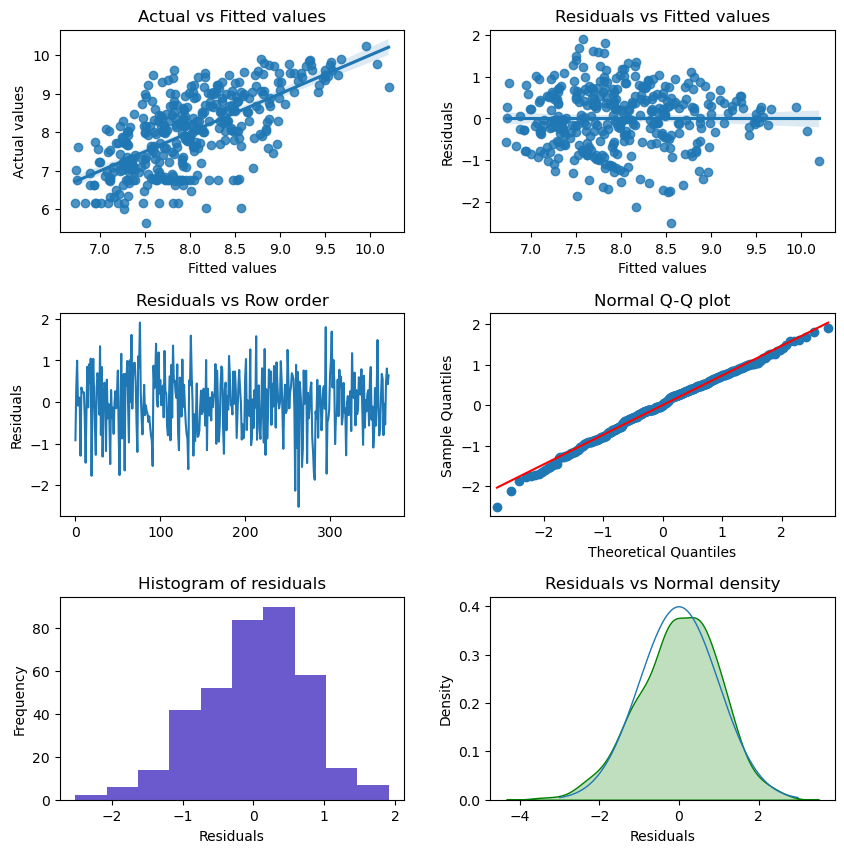

In [27]:
regression_B.plot("dashboard")

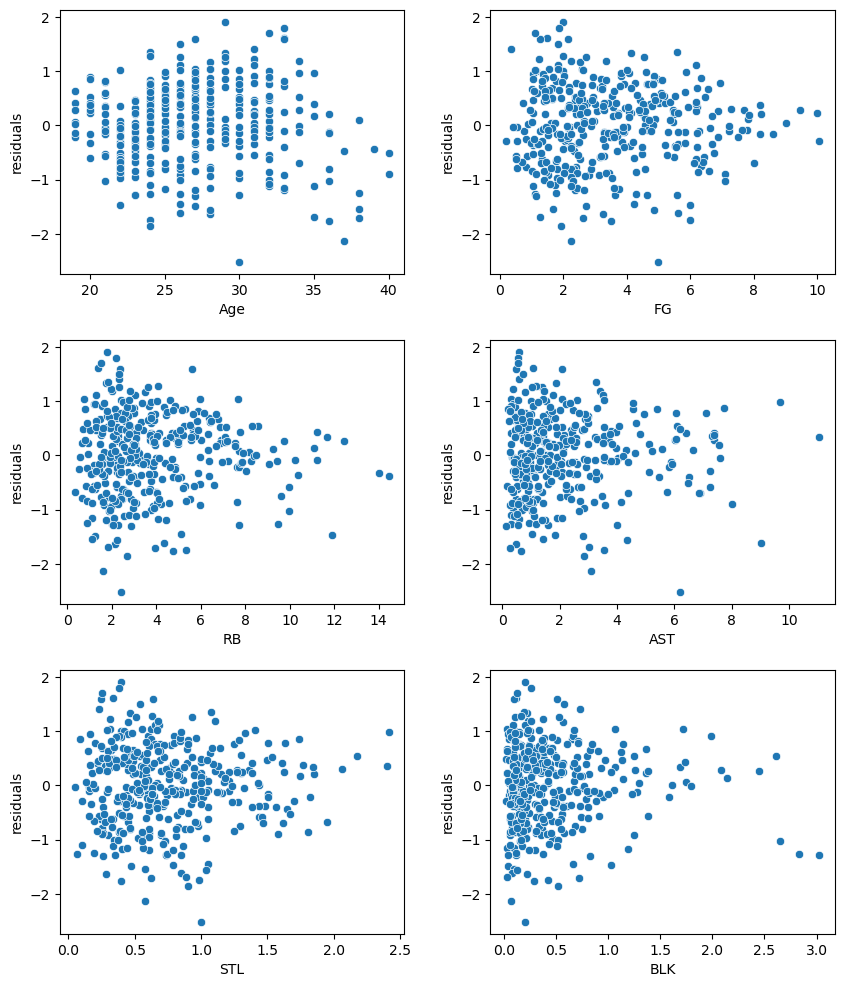

In [28]:
regression_B.plot("residuals")

In [30]:
# Regression C

X_3 = nba[['Age', 'FG', 'RB', 'AST', 'STL', 'BLK', 'PTS']]

model_C = LinearRegression().fit(X_3, Y_2)

model_C.coef_

array([[ 0.05759021, -0.11706181,  0.08274028,  0.04410204, -0.05249524,
         0.25085474,  0.11947731]])

In [31]:
regression_C = rsm.regress({"nba": nba}, rvar="log_Salary", evar=["Age", "FG", "RB", "AST", "STL", "BLK", "PTS"])
regression_C.summary()

Linear regression (OLS)
Data                 : nba
Response variable    : log_Salary
Explanatory variables: Age, FG, RB, AST, STL, BLK, PTS
Null hyp.: the effect of x on log_Salary is zero
Alt. hyp.: the effect of x on log_Salary is not zero

           coefficient  std.error  t.value p.value     
Intercept         5.30      0.253   20.961  < .001  ***
Age               0.06      0.009    6.525  < .001  ***
FG               -0.12      0.130   -0.901   0.368     
RB                0.08      0.027    3.081   0.002   **
AST               0.04      0.033    1.348   0.179     
STL              -0.05      0.139   -0.379   0.705     
BLK               0.25      0.117    2.153   0.032    *
PTS               0.12      0.046    2.592    0.01   **

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.465, Adjusted R-squared: 0.455
F-statistic: 45.024 df(7, 362), p.value < 0.001
Nr obs: 370


Points per Game (PTS):
Coefficient: 0.12 suggests that for each additional point scored per game, the salary is expected to increase by 12% when other factors are held constant.
p-value: 0.01, indicating that PTS is a statistically significant predictor of salary at the 1% level (indicated by '**').

-- Change in Coefficients: The addition of PTS to the model has led to changes in the coefficients of the other predictors. Notably, FG (Field Goals) has changed from positive to negative, though it is not statistically significant (p = 0.368). This could indicate multicollinearity, where FG and PTS are correlated with each other, leading to less clear-cut individual effects on the log_Salary.

-- Significance of Predictors: Age remains significantly positive, indicating older players tend to have higher salaries, consistent with experience being valued.
RB (Rebounds) is significant and positive, suggesting that players who get more rebounds tend to have higher salaries.
BLK (Blocks) has become significant with the addition of PTS, indicating its distinct contribution to predicting salary.
PTS is significant, which was expected as scoring is a key metric for player performance and compensation.

-- Effect on R-squared: The R-squared value remains relatively similar (0.465 vs. 0.455 previously), indicating that the overall explanatory power of the model hasn't drastically increased with the addition of PTS.

-- Why Might This Occur? : The likely reason for these changes is that PTS is a comprehensive measure that captures the scoring ability, which could be collinear with FG as it's part of how points are scored. When PTS is included, it absorbs some of the explanatory power that was previously attributed to FG. Additionally, since PTS is a highly visible performance metric, it may capture the market value of a player's performance more directly than individual components like field goals, hence its significance.

In [32]:
# Regression D

df = nba.copy()
df[['log_Salary', 'Age', 'RB', 'AST', 'STL', 'BLK', 'PTS']] = StandardScaler().fit_transform(df[['log_Salary', 'Age', 'RB','AST', 'STL', 'BLK', 'PTS']])

In [33]:
X_4 = df[['Age', 'RB', 'AST', 'STL', 'BLK', 'PTS']]
Y_4 = nba[['log_Salary']]

model_D = LinearRegression().fit(X_4, Y_2)

model_D.coef_


array([[ 0.25217841,  0.18368961,  0.07835285, -0.01798022,  0.10984374,
         0.42522638]])

In [34]:
# drop FG
regression_D = rsm.regress({"nba": df}, rvar="log_Salary", evar=["Age", "RB", "AST", "STL", "BLK", "PTS"])
regression_D.summary()

Linear regression (OLS)
Data                 : nba
Response variable    : log_Salary
Explanatory variables: Age, RB, AST, STL, BLK, PTS
Null hyp.: the effect of x on log_Salary is zero
Alt. hyp.: the effect of x on log_Salary is not zero

           coefficient  std.error  t.value p.value     
Intercept         0.00      0.038    0.000     1.0     
Age               0.25      0.039    6.545  < .001  ***
RB                0.18      0.063    2.953   0.003   **
AST               0.08      0.062    1.267   0.206     
STL              -0.02      0.060   -0.302   0.763     
BLK               0.11      0.054    2.046   0.042    *
PTS               0.43      0.066    6.514  < .001  ***

Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

R-squared: 0.464, Adjusted R-squared: 0.455
F-statistic: 52.42 df(6, 363), p.value < 0.001
Nr obs: 370


-- Intercept (Constant):
Coefficient: 0.00 indicates that when all predictors are at their mean values, the expected value of log_Salary is at its mean as well, which makes sense since the predictors are standardized.

-- Age:
Coefficient: 0.25 implies that a one standard deviation increase in age is associated with a 0.25 standard deviation increase in log_Salary, making it a strong predictor of salary.

--Rebounds (RB):
Coefficient: 0.18 means a one standard deviation increase in rebounds is associated with an 0.18 standard deviation increase in log_Salary.

-- Assists (AST):
Coefficient: 0.08, though not statistically significant, suggests assists have a smaller potential impact on salary compared to age or rebounds.

--Steals (STL):
Coefficient: -0.02 is not statistically significant and indicates a negligible association with log_Salary.

-- Blocks (BLK):
Coefficient: 0.11 indicates a moderate positive association with salary; a one standard deviation increase in blocks is associated with a 0.11 standard deviation increase in log_Salary.

-- Points (PTS):
Coefficient: 0.43 is the largest among the predictors, indicating that a one standard deviation increase in points per game is associated with a 0.43 standard deviation increase in log_Salary. This suggests that scoring ability is a highly important factor in determining a player’s salary.

-- R-squared remains relatively unchanged, meaning the overall explanatory power of the model is similar to the previous model with FG included.

-- In summary, standardized coefficients make it clear which variables are most influential on the response variable. In this model, PTS stands out as the most significant predictor of log_Salary, followed by Age and RB. This is valuable in understanding not just whether a predictor is significant, but also how strong its impact is relative to the other predictors in the model.

Using standardized coefficients in the regression model allows you to compare the relative importance of each predictor variable directly. Unlike the raw coefficients, which are in the units of the variables themselves and therefore can vary greatly in magnitude depending on those units, standardized coefficients are unitless. This is because they are derived from standardized versions of the variables (meaning they have been converted to have a mean of 0 and a standard deviation of 1).



Streaks

In [74]:
# List of players labeled from A to I
player_names = ["Player A", "Player B", "Player C", "Player D", "Player E", "Player F", "Player G", "Player H", "Player I"]

# Probabilities of hitting a shot after missing the previous one for each player
prob_hit_post_miss = [0.56, 0.51, 0.46, 0.60, 0.47, 0.51, 0.58, 0.52, 0.71]

# Overall probabilities of hitting a shot
overall_prob_hit = [0.5, 0.52, 0.46, 0.56, 0.47, 0.46, 0.54, 0.52, 0.62]

# Probabilities of hitting a shot after successfully hitting the previous one
prob_hit_post_hit = [0.49, 0.53, 0.46, 0.55, 0.45, 0.43, 0.53, 0.51, 0.57]

# Number of successful shots made by each player
successful_shots = [248, 884, 419, 339, 272, 451, 433, 351, 403]

# Actual runs scored by each player
scored_runs = [128, 431, 203, 172, 134, 245, 227, 176, 220]

# Creating a dictionary to hold the data
player_stats = {
    "Player": player_names,
    "Probability_Hit_After_Miss": prob_hit_post_miss,
    "Overall_Hit_Probability": overall_prob_hit,
    "Probability_Hit_After_Hit": prob_hit_post_hit,
    "Successful_Shots": successful_shots,
    "Scored_Runs": scored_runs
}

# Converting the dictionary into a pandas DataFrame
stats_df = pd.DataFrame(player_stats)
stats_df

,Player,Probability_Hit_After_Miss,Overall_Hit_Probability,Probability_Hit_After_Hit,Successful_Shots,Scored_Runs
0,Player A,0.56,0.50,0.49,248,128
1,Player B,0.51,0.52,0.53,884,431
2,Player C,0.46,0.46,0.46,419,203
3,Player D,0.60,0.56,0.55,339,172
4,Player E,0.47,0.47,0.45,272,134
5,Player F,0.51,0.46,0.43,451,245
6,Player G,0.58,0.54,0.53,433,227
7,Player H,0.52,0.52,0.51,351,176
8,Player I,0.71,0.62,0.57,403,220


Bird's Eye View of Data: The data shows the conditional probabilities of making a shot after a hit and after a miss for each player. A higher probability after a hit compared to after a miss would suggest the presence of a hot hand.

Hot Hand Exhibited: Player D, Player G, and especially Player I show higher probabilities of making a shot after having made the last one compared to after having missed one. This could be indicative of the hot hand phenomenon, as their performance seems to improve after making a shot.

No Hot Hand: Player C, Player E, and Player F have the same or even lower probabilities of making a shot after a hit compared to after a miss. This suggests there is no hot hand effect for these players, as their chances of scoring do not increase after making a shot.

Logical Reasoning: If making a previous shot increases a player's confidence or if there is a rhythm they get into, it might make them more likely to make their next shot, indicating a hot hand. On the other hand, if the probability of making the next shot does not increase after a hit, it would suggest that each shot is independent of the previous one, and there is no hot hand effect.

Statistical Significance: It is important to note that while some players seem to exhibit the hot hand based on conditional probabilities, statistical significance has not been assessed. To truly determine if the hot hand exists, a statistical test, such as a chi-squared test for independence, would need to be performed to see if the differences in probabilities are significant.

Null Hypothesis (H0): The null hypothesis could be that there is no difference in the probabilities of hitting a shot after hitting or missing the previous one. In other words, the hot hand phenomenon does not exist.

Alternative Hypothesis (H1): The alternative hypothesis is that the probability of hitting a shot is higher after hitting the previous shot compared to after missing it, suggesting the presence of the hot hand phenomenon.

Data Size: We have data for 9 players, which is a relatively small sample size.

Appropriate Distribution: Given the small sample size and the nature of the data (probabilities), a non-parametric test might be appropriate. However, a paired t-test could also be considered if the distribution of differences is roughly normal.

Comparison Measure: We might consider the difference between prob_hit_post_hit and prob_hit_post_miss for each player as the measure of interest.

In [76]:
def generate_shot(prev_shot, prob_hit, prob_hit_after_hit, prob_hit_after_miss):
    return np.random.rand() < (prob_hit_after_hit if prev_shot else prob_hit_after_miss)

def simulate_shooting_sequence(prob_hit, prob_hit_after_hit, prob_hit_after_miss, n_shots):
    initial_shot = np.random.rand() < prob_hit
    shots = reduce(lambda acc, _: acc + [generate_shot(acc[-1], prob_hit, prob_hit_after_hit, prob_hit_after_miss)], range(n_shots - 1), [initial_shot])
    return np.array(shots)

def count_runs(shots):
    return np.sum(shots[:-1] != shots[1:]) + 1

In [78]:
def simulate_player_performance(player_overall_hit_prob, player_hit_prob_post_hit, player_hit_prob_post_miss, total_shots, num_simulations=10000):
    runs = [count_runs(simulate_shooting_sequence(player_overall_hit_prob, player_hit_prob_post_hit, player_hit_prob_post_miss, total_shots)) 
            for _ in range(num_simulations)]
    return np.mean(runs), np.std(runs)

# Simulating for each player and storing the results with a reduced number of simulations
simulation_results = []
for index, player in enumerate(player_names):
    avg_runs, std_dev_runs = simulate_player_performance(overall_prob_hit[index], prob_hit_post_hit[index], prob_hit_post_miss[index], successful_shots[index], num_simulations=1000)
    stats_df.at[index, "Expected_Runs"] = avg_runs
    stats_df.at[index, "Std_Dev_Runs"] = std_dev_runs

stats_df

,Player,Probability_Hit_After_Miss,Overall_Hit_Probability,Probability_Hit_After_Hit,Successful_Shots,Scored_Runs,Expected_Runs,Std_Dev_Runs
0,Player A,0.56,0.50,0.49,248,128,132.654,7.878724
1,Player B,0.51,0.52,0.53,884,431,432.974,14.399560
2,Player C,0.46,0.46,0.46,419,203,209.132,10.131070
3,Player D,0.60,0.56,0.55,339,172,175.173,9.252409
4,Player E,0.47,0.47,0.45,272,134,138.471,8.381358
5,Player F,0.51,0.46,0.43,451,245,243.192,10.413027
6,Player G,0.58,0.54,0.53,433,227,224.944,10.579549
7,Player H,0.52,0.52,0.51,351,176,177.709,9.382874
8,Player I,0.71,0.62,0.57,403,220,216.374,10.543440


In [80]:
# Calculating the Z-Score
stats_df['Z_Score'] = (stats_df['Scored_Runs'] - stats_df['Expected_Runs']) / stats_df['Std_Dev_Runs']

# Calculating the P-Value for a two-tailed test
stats_df['P_Value'] = 2 * norm.sf(abs(stats_df['Z_Score']))

# Displaying the P-Value column
stats_df['P_Value']

0    0.554718
1    0.890962
2    0.545002
3    0.731645
4    0.593725
5    0.862157
6    0.845912
7    0.855473
8    0.730914
Name: P_Value, dtype: float64

In [81]:
# Iterating through each player's data in stats_df
for _, player_data in stats_df.iterrows():
    # Checking the P-Value to determine the hypothesis outcome
    if player_data['P_Value'] < 0.05:
        print(f"Null hypothesis rejected for {player_data['Player']}. Indications of 'Hot Hands' phenomenon.")
    else:
        print(f"Insufficient evidence to reject null hypothesis for {player_data['Player']}. 'Hot Hands' may not exist.")

Insufficient evidence to reject null hypothesis for Player A. 'Hot Hands' may not exist.
Insufficient evidence to reject null hypothesis for Player B. 'Hot Hands' may not exist.
Insufficient evidence to reject null hypothesis for Player C. 'Hot Hands' may not exist.
Insufficient evidence to reject null hypothesis for Player D. 'Hot Hands' may not exist.
Insufficient evidence to reject null hypothesis for Player E. 'Hot Hands' may not exist.
Insufficient evidence to reject null hypothesis for Player F. 'Hot Hands' may not exist.
Insufficient evidence to reject null hypothesis for Player G. 'Hot Hands' may not exist.
Insufficient evidence to reject null hypothesis for Player H. 'Hot Hands' may not exist.
Insufficient evidence to reject null hypothesis for Player I. 'Hot Hands' may not exist.


### Critical Thinking

What might make the hot hand easier or more difficult to observe in either sport?

Baseketball: As observed from the graph, at the same field goal percentage (%FG), an increase in points corresponds to an increase in the number of attempts. This trend could indicate the absence of a 'hot hand' phenomenon. Ideally, if the hot hand were present, we would expect to see fewer attempts when points are high, as players experiencing a hot hand should be scoring more efficiently. However, to answer the question, There are some pivotal factors reflect hot hand presence. The percentage of successful field goals (%FG), or the likelihood of a basketball player scoring in each attempt, may vary depending on the distance between the shooting position and the basket. Certain players, influenced by their personality or height, may be more inclined to attempt long-range shots. This preference for long shots could decrease the likelihood of observing the 'hot hand' phenomenon. On the other hand, taller players might prefer scoring closer to the basket or executing so-called dunks; therefore, this tendency could mislead the interpretation of the hot hand phenomenon. Moreover, the quality of the opponent's defense also comes into play, so we should pursue an analysis match by match, not just based on total run time. This is important because if our observations include only games where the player faces strong defensive players, it might skew the results.

Baseball: Many factors blatantly affect the observation of the 'hot hand' phenomenon. One key factor is the variability in pitching; facing different pitchers with varying styles and strengths can introduce significant variability in a batter's performance, making it more difficult to discern streaks. Moreover, the overall probability of hitting the ball in baseball is noticeably lower than scoring in basketball. Consequently, the conditional probability of hitting the ball in consecutive at-bats, or maintaining a streak, is also significantly lower..

What would you need to do in order to establish that the hot hand exists in basketball?

To establish the existence of the hot hand in basketball, it's essential to set up key variables, such as the distance from which each player attempts to score. Additionally, controlling for player fatigue by considering the number of minutes played, and the quality of the opponent's defenders is crucial. In analyzing the hot hand phenomenon, these factors, which can significantly influence the outcome, should be carefully controlled. The conditional probability for each player to make their next shot given that they missed the previous shot and 
the conditional probability for each player to make their next shot given that they made the previous shot are also important.

How you would build a regression model to try to establish that a hot hand exists?

By incorporating potentially critical factors into our regression model, we aim to assess how significantly they influence the variation in the conditional probability, P(make shot | make shot). if such variables

What would be critical predictor variables?

- Distance from which each player attempts to score.
- Number of minutes each player has played.
- Quality of the opponent's defenders.
- Height of each player.

How much data would you need?

To influence the t-distribution to approximate a normal distribution, applying the Central Limit Theorem, each individual player should have data from more than 30 games. This is crucial for setting up hypothesis testing effectively.